<center>

<img src="https://upload.wikimedia.org/wikipedia/commons/a/a8/%D0%9B%D0%9E%D0%93%D0%9E_%D0%A8%D0%90%D0%94.png" width=300px/>

<h2>Python: модули, пакеты и система импорта</h2>
<h3>Дмитрий Браженко</h3>
<br />
<h4>2022</h4>

</center>

# Модули

## Базовый пример [happy_0]

Базовый сценарий. Спрятать часть функций/имен в отдельный файл. Создадим файл happy_0.py в директории рядом с нашим ноутбуком

In [1]:
%%file happy_0.py
"""I am a happy module"""

foo = 'foobar'

def bar():
    return foo

print('Happy module is running!!')

Overwriting happy_0.py


In [2]:
import happy_0

Happy module is running!!


В момент импорта файл запускается целиком. То, что написано - выполняется

In [3]:
happy_0.bar()

'foobar'

In [4]:
exit()

In [5]:
from happy_0 import foo, bar
# не рекомендуется писать  from happy_0 import *

In [6]:
foo

'foobar'

In [7]:
bar()

'foobar'

Про перезагрузку модулей можно прочитать [тут](https://realpython.com/lessons/reloading-module/)

## Откуда модуль импортируется

In [8]:
exit()

In [9]:
import numpy as np

In [10]:
import sys
print(sys.path)

['/Users/brazhenko/Desktop/06.1.ModulesPackagesImport', '/Users/brazhenko/.pyenv/versions/3.7.3/lib/python37.zip', '/Users/brazhenko/.pyenv/versions/3.7.3/lib/python3.7', '/Users/brazhenko/.pyenv/versions/3.7.3/lib/python3.7/lib-dynload', '', '/Users/brazhenko/.pyenv/versions/3.7.3/lib/python3.7/site-packages', '/Users/brazhenko/.pyenv/versions/3.7.3/lib/python3.7/site-packages/IPython/extensions', '/Users/brazhenko/.ipython']


In [11]:
np.__file__

'/Users/brazhenko/.pyenv/versions/3.7.3/lib/python3.7/site-packages/numpy/__init__.py'

Создадим файл examples/happy.py

In [12]:
%%file examples/happy.py
"""I am a happy module"""

foo = 'foobar'

def bar():
    return foo

print('Happy module is running!!')

Overwriting examples/happy.py


Любой файл с расширением .py, содержащий python-код, является модулем, его можно импортировать. Требуется импортировать модуль 

In [13]:
import happy

ModuleNotFoundError: No module named 'happy'

In [2]:
# Добавим папку examples
import sys
sys.path.insert(0, "examples")
sys.path

['examples',
 '/Users/brazhenko/Desktop/06.1.ModulesPackagesImport',
 '/Users/brazhenko/.pyenv/versions/3.7.3/lib/python37.zip',
 '/Users/brazhenko/.pyenv/versions/3.7.3/lib/python3.7',
 '/Users/brazhenko/.pyenv/versions/3.7.3/lib/python3.7/lib-dynload',
 '',
 '/Users/brazhenko/.pyenv/versions/3.7.3/lib/python3.7/site-packages',
 '/Users/brazhenko/.pyenv/versions/3.7.3/lib/python3.7/site-packages/IPython/extensions',
 '/Users/brazhenko/.ipython']

In [3]:
import happy
happy.bar()

Happy module is running!!


'foobar'

При импорте содержимое модуля исполняется, результат кешируется

При импорте модуля создаётся объект типа module, его пространство имён наполняется содержимым модуля и специальными атрибутами:

In [4]:
print(happy)
print(type(happy))

<module 'happy' from 'examples/happy.py'>
<class 'module'>


In [5]:
dir(happy)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'bar',
 'foo']

In [91]:
print(f'{happy.__name__}')
print(f'{happy.__doc__}')
print(f'{happy.__file__}') 

happy
I am a happy module
examples/happy.py


При запуске модуля как скрипта специальная переменная `__name__` будет иметь значение `"__main__"`.

In [7]:
%%file examples/happytest.py
import happy

def test():
    assert happy.bar() == happy.foo

if __name__ == "__main__":
    print('Running test')
    test()
    print('OK')    

Overwriting examples/happytest.py


In [8]:
!python examples/happytest.py

Happy module is running!!
Running test
OK


<div class="alert alert-danger">
    <b>Антипаттерн:</b> объекты из <code>if __name__ == "__main__":</code> утекают в глобальное пространство имён
</div>

Пример общеизвестной библиотеки с анти-паттерном: [pyTelegrambotApi](https://github.com/eternnoir/pyTelegramBotAPI/blob/master/telebot/__init__.py)

In [9]:
%%file examples/nameleak.py

def foo():
    print(message)

if __name__ == "__main__":
    print('Running test...')
    message = 'I just leaked to global namespace'
    foo()

Overwriting examples/nameleak.py


In [10]:
!python examples/nameleak.py

Running test...
I just leaked to global namespace


Рекомендуем делать функцию `main()` и вызывать её в блоке `if __name__ == "__main__"`.
Например:
```
def main():
    message = ....
    arguments = argparse...
    ....

if __name__ == "__main__":
    main()
```


 Импортировать модули можно по-разному

In [ ]:
import numpy
import numpy, pandas, requests  # bad style
import numpy as np
from numpy import absolute, array
from numpy import absolute as abs, array  # bad style
from numpy import absolute as _abs, array
from numpy import *  # bad practice
from .examples import happy
from .examples.happytest import bar

### Style guide
* Все импорты в начале модуля
* Сначала `import`, потом `from ... import`
* Отсортированы в лексикографическом порядке
* Разбиты на 3 группы:
  - Импорты модулей стандартной библиотеки
  - Импорты сторонних библиотек
  - Собственные импорты
 
Где описано
* https://www.python.org/dev/peps/pep-0008/#imports
* https://google.github.io/styleguide/pyguide.html#s2.2-imports

Пример, как надо:

```python
import dataclasses
import types
import pathlib
from pathlib import Path  # bad style according to google

import numpy
import pytest

from .codeops import count_operations
```

`from <name> import *` импортирует все имена из модуля, кроме тех что начинаются с `_`

In [12]:
%%file examples/circle.py
from math import pi as _pi

some_string = 'some_string'

def get_circumference(radius):
    return 2 * _pi * radius

Overwriting examples/circle.py


In [13]:
from circle import *
assert '_pi' not in globals()
get_circumference(1)
print(some_string)

some_string


Список импортируемых через `*` имён можно кастомизировать с помощью переменной `__all__`

In [19]:
%%file examples/allstar.py

x = 100
y = 200
_z = 300

__all__ = ['x', '_z']

Overwriting examples/allstar.py


In [20]:
from allstar import *
print(x, _z)
assert 'y' not in globals()

100 300


При первом импорте модуля его содержимое компилируется и кешируется в файле с расширением `.pyc`. Это нужно для ускорения повторной загрузки модуля при следующих запусках.   

In [21]:
happy.__cached__

'examples/__pycache__/happy.cpython-37.pyc'

При изменении кода модуля он перекомпилируется при следующем запуске.

... Но не в `ipython`. Для него нужно прописать:

> ```python
%load_ext autoreload
%autoreload 2
```

In [22]:
import math

In [23]:
math.__file__

'/Users/brazhenko/.pyenv/versions/3.7.3/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'

При импорте модуля `<name>`, интерпретатор ищет файл `<name>.py` в списке директорий `sys.path`.

* `sys.path` включает текущую директорию
* Зависит от окружения, модифицируется в модуле `site`, содержит путь к `site-packages`
* Можно кастомизировать с помощью переменной окружения PYTHONPATH
* Можно менять в рантайме

In [24]:
import sys
sys.path

['examples',
 '/Users/brazhenko/Desktop/06.1.ModulesPackagesImport',
 '/Users/brazhenko/.pyenv/versions/3.7.3/lib/python37.zip',
 '/Users/brazhenko/.pyenv/versions/3.7.3/lib/python3.7',
 '/Users/brazhenko/.pyenv/versions/3.7.3/lib/python3.7/lib-dynload',
 '',
 '/Users/brazhenko/.pyenv/versions/3.7.3/lib/python3.7/site-packages',
 '/Users/brazhenko/.pyenv/versions/3.7.3/lib/python3.7/site-packages/IPython/extensions',
 '/Users/brazhenko/.ipython']

Циклические импорты

In [25]:
%%file examples/cycle_foo.py
from cycle_bar import xyz

abc = 100

Overwriting examples/cycle_foo.py


In [26]:
%%file examples/cycle_bar.py
from cycle_foo import abc

xyz = 100

Overwriting examples/cycle_bar.py


In [27]:
import cycle_foo

ImportError: cannot import name 'abc' from 'cycle_foo' (examples/cycle_foo.py)

Что делать с циклическими импортами?

* Вынести общую функциональность в отдельный модуль
* Забить на pep8!
  - Спрятать вызов внутрь функции, где он используется
  - Поставить импорт в конец

In [28]:
%%file examples/cycle_foo.py
 
abc = 100
from cycle_bar import xyz

Overwriting examples/cycle_foo.py


In [29]:
import cycle_foo

# Пакеты

* Пакеты == директории с модулями
* Позволяют строить иерархии модулей и лучше структурировать код
* Любая директория с файлом `__init__.py` является пакетом

In [112]:
!tree --dirsfirst mypack

mypack
├── __pycache__
│   ├── __init__.cpython-37.pyc
│   └── foo.cpython-37.pyc
├── bar
│   ├── __pycache__
│   │   ├── __init__.cpython-37.pyc
│   │   ├── __main__.cpython-37.pyc
│   │   └── spam.cpython-37.pyc
│   ├── __init__.py
│   ├── __main__.py
│   └── spam.py
├── not_a_packet
├── __init__.py
└── foo.py

4 directories, 10 files


In [113]:
%%file mypack/__init__.py
"""I am empty"""
print("__init__.py was just loaded")

Overwriting mypack/__init__.py


In [1]:
import mypack
mypack  # импортируется только __init__.py!

__init__.py was just loaded


<module 'mypack' from '/Users/brazhenko/Desktop/06.1.ModulesPackagesImport/mypack/__init__.py'>

In [37]:
mypack.foo

AttributeError: module 'mypack' has no attribute 'foo'

Модули, входящие в пакет, нужно импортировать явно

In [38]:
import mypack.foo

In [39]:
mypack.foo.__name__

'mypack.foo'

В `__init__.py` можно производить инициализацию пакета. Полезны относительные импорты.

In [40]:
%%file mypack/bar/__init__.py
from . import spam
from .. import foo

__all__ = ['spam', 'foo']

Overwriting mypack/bar/__init__.py


In [41]:
from mypack.bar import *
print(spam.__name__)
print(foo.__name__)

mypack.bar.spam
mypack.foo


<div class="alert alert-danger">
<b>Антипаттерн:</b> реализовывать логику в  __init__.py
</div>

In [42]:
%%file mypack/bar/__init__.py
from . import spam
from .. import foo

def abs(a):
    return abs(a)

__all__ = ['spam', 'foo', 'abs']

Overwriting mypack/bar/__init__.py


In [43]:
!python mypack.bar

python: can't open file 'mypack.bar': [Errno 2] No such file or directory


Пакеты можно исполнять как скрипты. Для этого нужен файл `__main__.py`
* Полезно при разработке пайплайнов

In [ ]:
%%file mypack/bar/__main__.py
print("Hello from bar.__main__!")

In [44]:
!python -m mypack.bar

Hello from bar.__main__!


# Распространение пакетов


Ссылки про сборку и установку пакетов

- https://docs.python.org/3/installing/index.html
- https://docs.python.org/3/distributing/index.html
- https://packaging.python.org/

In [53]:
!pip3 install --upgrade --force-reinstall  numpy

  Using cached https://files.pythonhosted.org/packages/32/dd/43d8b2b2ebf424f6555271a4c9f5b50dc3cc0aafa66c72b4d36863f71358/numpy-1.21.6-cp37-cp37m-macosx_10_9_x86_64.whl
  Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
You are using pip version 19.0.3, however version 22.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


https://setuptools.pypa.io/en/latest/userguide/declarative_config.html

[setup.py vs setup.cfg in Python](https://towardsdatascience.com/setuptools-python-571e7d5500f2)

In [92]:
%%file setup.cfg
[metadata]
name = mypack
version = 0.2.0
author=Dmitry Brazhenko & Konstantin Chernyshev
description = An awesome package that does something
keywords = one, two
license = BSD 3-Clause License
classifiers =
    Programming Language :: Python :: 3
    Programming Language :: Python :: 3.9
   
[options]
packages = find:
install_requires =
    requests

Overwriting setup.cfg


"PEP 517 doesn’t support editable installs so this is currently incompatible with  
`pip install -e`"

In [93]:
%%file setup.py
from setuptools import setup

setup()

Overwriting setup.py


А чем собирать? 

pyproject.toml 
* https://www.python.org/dev/peps/pep-0518/
* https://snarky.ca/what-the-heck-is-pyproject-toml/
* https://pip.pypa.io/en/stable/reference/build-system/pyproject-toml/
* https://packaging.python.org/en/latest/specifications/declaring-project-metadata/#declaring-project-metadata
* https://ianhopkinson.org.uk/2022/02/understanding-setup-py-setup-cfg-and-pyproject-toml-in-python/

https://www.python.org/dev/peps/pep-0518/#configparser
    

```
[build]
requires =
    setuptools
    wheel>=0.27
```

In [94]:
%%file pyproject.toml
[build-system]
requires = ["setuptools", "wheel>=0.27"]
build-backend = "setuptools.build_meta"

Writing pyproject.toml


А может туда ещё и метадату запихнём? 

https://www.python.org/dev/peps/pep-0621/

### Wheels
https://www.python.org/dev/peps/pep-0427/  
https://www.python.org/dev/peps/pep-0491/  

In [81]:
!python setup.py sdist bdist_wheel

running sdist
running egg_info
writing mypack.egg-info/PKG-INFO
writing dependency_links to mypack.egg-info/dependency_links.txt
writing top-level names to mypack.egg-info/top_level.txt
reading manifest file 'mypack.egg-info/SOURCES.txt'
writing manifest file 'mypack.egg-info/SOURCES.txt'

running check


creating mypack-0.2.0
creating mypack-0.2.0/mypack
creating mypack-0.2.0/mypack.egg-info
creating mypack-0.2.0/mypack/bar
copying files to mypack-0.2.0...
copying setup.cfg -> mypack-0.2.0
copying setup.py -> mypack-0.2.0
copying mypack/__init__.py -> mypack-0.2.0/mypack
copying mypack/foo.py -> mypack-0.2.0/mypack
copying mypack.egg-info/PKG-INFO -> mypack-0.2.0/mypack.egg-info
copying mypack.egg-info/SOURCES.txt -> mypack-0.2.0/mypack.egg-info
copying mypack.egg-info/dependency_links.txt -> mypack-0.2.0/mypack.egg-info
copying mypack.egg-info/top_level.txt -> mypack-0.2.0/mypack.egg-info
copying mypack/bar/__init__.py -> mypack-0.2.0/mypack/bar
copying mypack/bar/__main__.py -> mypa

In [82]:
!tree -I "__pycache__|examples|*.ipynb|*.css"

.
├── build
│   ├── bdist.macosx-10.15-x86_64
│   └── lib
│       └── mypack
│           ├── __init__.py
│           ├── bar
│           │   ├── __init__.py
│           │   ├── __main__.py
│           │   └── spam.py
│           └── foo.py
├── builtins_demo.py
├── dist
│   ├── mypack-0.2.0-py3-none-any.whl
│   ├── mypack-0.2.0-py3.7.egg
│   └── mypack-0.2.0.tar.gz
├── happy_0.py
├── mypack
│   ├── __init__.py
│   ├── bar
│   │   ├── __init__.py
│   │   ├── __main__.py
│   │   └── spam.py
│   └── foo.py
├── mypack.egg-info
│   ├── PKG-INFO
│   ├── SOURCES.txt
│   ├── dependency_links.txt
│   └── top_level.txt
├── setup.cfg
└── setup.py

9 directories, 21 files


In [83]:
!tar -ztvf dist/mypack-0.2.0.tar.gz

drwxr-xr-x  0 brazhenko staff       0 Oct 15 18:47 mypack-0.2.0/
-rw-r--r--  0 brazhenko staff     340 Oct 15 18:47 mypack-0.2.0/PKG-INFO
drwxr-xr-x  0 brazhenko staff       0 Oct 15 18:47 mypack-0.2.0/mypack/
-rw-rw-r--  0 brazhenko staff      20 Oct 15 18:30 mypack-0.2.0/mypack/__init__.py
drwxr-xr-x  0 brazhenko staff       0 Oct 15 18:47 mypack-0.2.0/mypack/bar/
-rw-rw-r--  0 brazhenko staff     103 Oct 15 18:31 mypack-0.2.0/mypack/bar/__init__.py
-rw-rw-r--  0 brazhenko staff      34 Jan 27  2022 mypack-0.2.0/mypack/bar/__main__.py
-rw-rw-r--  0 brazhenko staff       0 Jan 27  2022 mypack-0.2.0/mypack/bar/spam.py
-rw-rw-r--  0 brazhenko staff       0 Jan 27  2022 mypack-0.2.0/mypack/foo.py
drwxr-xr-x  0 brazhenko staff       0 Oct 15 18:47 mypack-0.2.0/mypack.egg-info/
-rw-r--r--  0 brazhenko staff     340 Oct 15 18:47 mypack-0.2.0/mypack.egg-info/PKG-INFO
-rw-r--r--  0 brazhenko staff     236 Oct 15 18:47 mypack-0.2.0/mypack.egg-info/SOURCES.txt
-rw-r--r--  0 brazhenko staff     

In [84]:
!tar -ztvf dist/mypack-0.2.0-py3-none-any.whl

-rw-r--r--  0 0      0          20 Oct 15 16:30 mypack/__init__.py
-rw-r--r--  0 0      0           0 Jan 27  2022 mypack/foo.py
-rw-r--r--  0 0      0         103 Oct 15 16:31 mypack/bar/__init__.py
-rw-r--r--  0 0      0          34 Jan 27  2022 mypack/bar/__main__.py
-rw-r--r--  0 0      0           0 Jan 27  2022 mypack/bar/spam.py
-rw-r--r--  0 0      0         340 Oct 15 16:47 mypack-0.2.0.dist-info/METADATA
-rw-r--r--  0 0      0          92 Oct 15 16:47 mypack-0.2.0.dist-info/WHEEL
-rw-r--r--  0 0      0           7 Oct 15 16:47 mypack-0.2.0.dist-info/top_level.txt
-rw-rw-r--  0 0      0         659 Oct 15 16:47 mypack-0.2.0.dist-info/RECORD


### Eggs
https://www.python.org/dev/peps/pep-0376/

In [95]:
!python setup.py install
#pip install -e . 

running install
running bdist_egg
running egg_info
writing mypack.egg-info/PKG-INFO
writing dependency_links to mypack.egg-info/dependency_links.txt
writing requirements to mypack.egg-info/requires.txt
writing top-level names to mypack.egg-info/top_level.txt
reading manifest file 'mypack.egg-info/SOURCES.txt'
writing manifest file 'mypack.egg-info/SOURCES.txt'
installing library code to build/bdist.macosx-10.15-x86_64/egg
running install_lib
running build_py
creating build/bdist.macosx-10.15-x86_64/egg
creating build/bdist.macosx-10.15-x86_64/egg/mypack
copying build/lib/mypack/__init__.py -> build/bdist.macosx-10.15-x86_64/egg/mypack
creating build/bdist.macosx-10.15-x86_64/egg/mypack/bar
copying build/lib/mypack/bar/spam.py -> build/bdist.macosx-10.15-x86_64/egg/mypack/bar
copying build/lib/mypack/bar/__init__.py -> build/bdist.macosx-10.15-x86_64/egg/mypack/bar
copying build/lib/mypack/bar/__main__.py -> build/bdist.macosx-10.15-x86_64/egg/mypack/bar
copying build/lib/mypack/foo.py 

In [59]:
!tree -I "__pycache__|examples|*.ipynb|*.css"

.
├── build
│   ├── bdist.macosx-10.15-x86_64
│   └── lib
│       └── mypack
│           ├── __init__.py
│           ├── bar
│           │   ├── __init__.py
│           │   ├── __main__.py
│           │   └── spam.py
│           └── foo.py
├── builtins_demo.py
├── dist
│   └── mypack-0.2.0-py3.7.egg
├── happy_0.py
├── mypack
│   ├── __init__.py
│   ├── bar
│   │   ├── __init__.py
│   │   ├── __main__.py
│   │   └── spam.py
│   └── foo.py
├── mypack.egg-info
│   ├── PKG-INFO
│   ├── SOURCES.txt
│   ├── dependency_links.txt
│   └── top_level.txt
├── setup.cfg
└── setup.py

9 directories, 19 files


### Egg vs Wheel 

> The Egg format was introduced by setuptools in 2004, whereas the Wheel format was introduced by PEP 427 in 2012.


https://packaging.python.org/discussions/wheel-vs-egg/

> * Wheel has an official PEP. Egg did not.
> * Wheel distribution format, Egg - distribution format and a runtime installation format

## PyPI
The Python Package Index

https://pypi.org/

Разработчики библиотек публикуют wheel'ы на PyPI

> ```bash
pip install Faker
```

In [65]:
%pip uninstall -y Faker

Uninstalling Faker-15.1.1:
  Successfully uninstalled Faker-15.1.1
Note: you may need to restart the kernel to use updated packages.


In [66]:
%pip install Faker

  Using cached https://files.pythonhosted.org/packages/ca/72/8ec0f59e534dc150942c661611129dd7732d236968d26e744482e19c5701/Faker-15.1.1-py3-none-any.whl
You are using pip version 19.0.3, however version 22.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# Система импорта

Функция `__import__` имеет side-effect: загруженный модуль кешируется в словаре `sys.modules`

In [68]:
import sys
sys.modules['sys'] is sys

True

* При повторном импорте возвращается объект из `sys.modules`.
* При импорте модуля в разных частях программы вы получите один и тот же объект.
* Благодаря этому свойству модули можно использовать как синглтоны.
* Для перезагрузки модулей в интерактивном режиме есть `importlib.reload`, так же ipython-магия `%autoreload`.



Пример:
```
# тут установлен numpy версии 1
import numpy
# тут вы обновили numpy до версии 2, но не перезапустили kernel в jupyter
import numpy # <- numpy останется на версии 1
```

Хардкорный доклад Дэвида Бизли про систему импорта в питоне, на 200 слайдов!

http://www.dabeaz.com/modulepackage/

In [73]:
%%file builtins_demo.py
import builtins

def foo():
    print('I am imported!')
    print(f'{__builtins__ is builtins}')
    print(f'{__builtins__ is builtins.__dict__}')

if __name__ == '__main__':
    print('I am main module!')
    print(f'{__builtins__ is builtins}')
    print(f'{__builtins__ is builtins.__dict__}')

Overwriting builtins_demo.py


In [74]:
!python builtins_demo.py

I am main module!
True
False


In [111]:
!python -c 'from builtins_demo import foo; foo()'

I am imported!
False
True


# Бонус 1: консольные утилиты из Python-пакетов


* При установке библиотеки добавить "console entry_point". [Пример](https://python-packaging.readthedocs.io/en/latest/command-line-scripts.html)
* Для считывания входных аргументов можно исопльзовать [Typer](https://towardsdatascience.com/typer-probably-the-simplest-to-use-python-command-line-interface-library-17abf1a5fd3e), [Click](https://click.palletsprojects.com/en/8.1.x/arguments/), Argparse

# Бонус 2: ipywidgets для аналитических библиотек

[Коллекция примеров](https://github.com/jupyter-widgets/ipywidgets/tree/master/docs/source/examples)

* Полезная тулза при разработке аналитических и jupyter-ориентированных библиотек

In [109]:
import ipywidgets
a = ipywidgets.IntSlider(value=6, min=0, max=10)
a

IntSlider(value=6, max=10)

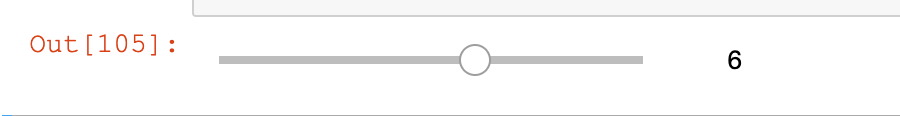